###### This rerpot was made by Nadia FRIKHA and Rania MIDAOUI, RT4-G2

# How to Use Histogram Equalization

Histogram Equalization is an image processing technique that adjusts the contrast of an image by using its histogram. To enhance the image’s contrast, it spreads out the most frequent pixel intensity values or stretches out the intensity range of the image. By accomplishing this, histogram equalization allows the image’s areas with lower contrast to gain a higher contrast.

#### 1- We first import :
- the OpenCV-Python package
- NumPy and Matplotlib to demonstrate the histogram equalization.

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

#### 2+3 - We then import and show the image using 2 methods :

In [2]:
# read "flower.png" from local directory
path = "flower.png"
img = cv.imread(path)
# convert the color model from the default BGR to GRAY (grayscale no colors)
grayimg = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

First method to show image:

In [3]:
cv.imshow('image',img)
cv.waitKey(0) #It waits for 0 milliseconds for a key press on a OpenCV window and handles any windowing events
cv.destroyAllWindows()

Second method to show image:

<function matplotlib.pyplot.show(*args, **kw)>

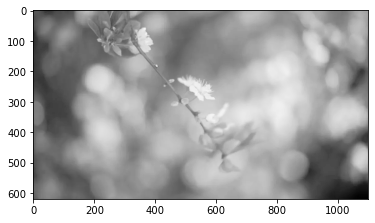

In [4]:
plt.imshow(grayimg , cmap="Greys_r")
# We need to use cmap="Greys_r" to display a grayscale image
plt.show

#### 4- View the image's histogram:

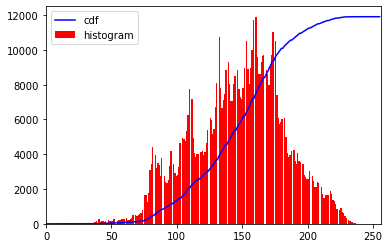

In [5]:
hist,bins = np.histogram(grayimg.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(grayimg.flatten(),256,[0,256], color = 'r')
#flatten here is used to collapse the image's pixels matrix into one dimension, hence, reducing the calculations complexity
plt.xlim([0,256])

plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

#### 5- Observation

At some point, the CDF reaches a maximum (N*M with M the number of rows of the images's pixels matrix and N, its number of column) and then stabilizes.
The brightness and the average grayscale are nearly correct, the grayscale distribution is still not well-balanced in the image  and there is a little difference between the grayscales but it can pass.
The histogram doesn't occupy all the dynamic -> the image can almost be considered as a low-contrast image, the contrast can be more improved.

#### 6 - We invert the image's gray values and display it along with its histogram:

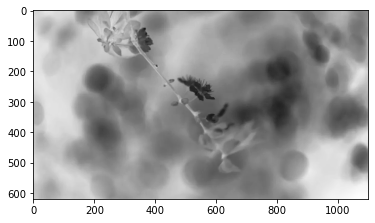

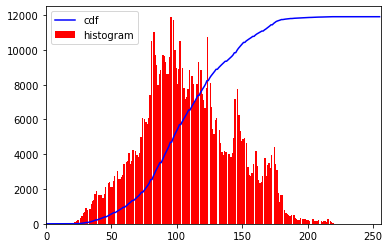

In [6]:
inverted= 255 - grayimg
plt.imshow(inverted, cmap='Greys_r')
plt.show()

hist,bins = np.histogram(inverted.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(inverted.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

#### 7 -  We use OpenCV-Python’s .equalizeHist() method to spread out the pixel intensity values. We assign the resulting image to the variable ‘equ’

In [7]:
equ = cv.equalizeHist(grayimg)

####  8 - We visualize the resulting image and its histogram:

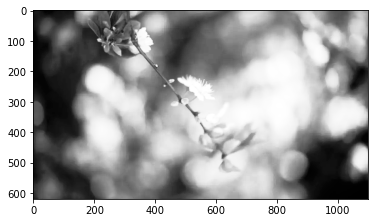

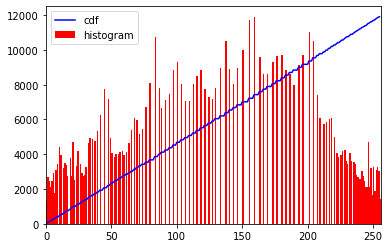

In [8]:
plt.imshow(equ, cmap='Greys_r')
plt.show()

hist,bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

# Direct Calculation: Apply global equalization equation without using opencv method

We find the minimum histogram value (excluding 0) and apply the histogram equalization:

In [9]:
cdf_m = np.ma.masked_equal(cdf,0) #We mask the image parts where the cdf is equal to 0 to optimize calculations
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8') #We fill the masked image parts with zeroes

We apply the transform to the image:

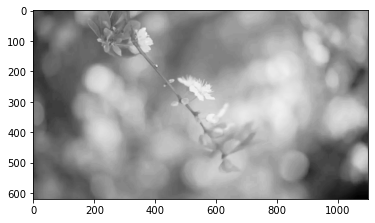

In [10]:
img2 = cdf[grayimg]
plt.imshow(img2, cmap="Greys_r")
plt.show()

# Adaptive Histogram Equalization (AHE)

Adaptive histogram equalization (AHE) is an image pre-processing technique used to improve contrast in images. It computes several histograms, each corresponding to a distinct section of the image, and uses them to redistribute the luminance values of the image.

#### 9 - We use another library skimage:
With adaptive histogram equalization, we divide an input image into an M x N grid. We then apply equalization to each cell in the grid, resulting in a higher quality output image.


In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from skimage import data
from skimage.util import img_as_ubyte
from skimage import exposure
import skimage.morphology as morp
from skimage.filters import rank
from skimage.io import imsave, imread

path = 'flower.png'
img = img_as_ubyte(imread(path, as_gray=True))

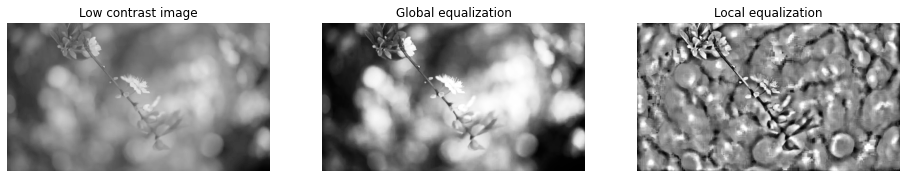

In [12]:
# Global equalize
img_g = exposure.equalize_hist(img)
# equalize_ist gives a float 64, we need to convert the output with img_as_ubyte to get the right values
img_global = img_as_ubyte(img_g)
# Local Equalization, disk shape kernel. Better contrast with disk kernel but could be different
kernel = morp.disk(30)
img_local = rank.equalize(img, selem=kernel) # rank: applies equalization according to the structuring element
#selem is deprecated in some versions (not in ours), footprint can be used instead.
plt.rcParams['figure.figsize'] = [16, 16]
#To get the 3 resulting images in a single plot
fig, (ax_img, ax_global, ax_local) = plt.subplots(1, 3)

ax_img.imshow(img, cmap=plt.cm.gray)
ax_img.set_title('Low contrast image')
ax_img.set_axis_off()

ax_global.imshow(img_global, cmap=plt.cm.gray)
ax_global.set_title('Global equalization')
ax_global.set_axis_off()

ax_local.imshow(img_local, cmap=plt.cm.gray)
ax_local.set_title('Local equalization')
ax_local.set_axis_off()

plt.show()

## Let's see the images and their respective histograms one by one : 

### Low-contrast image

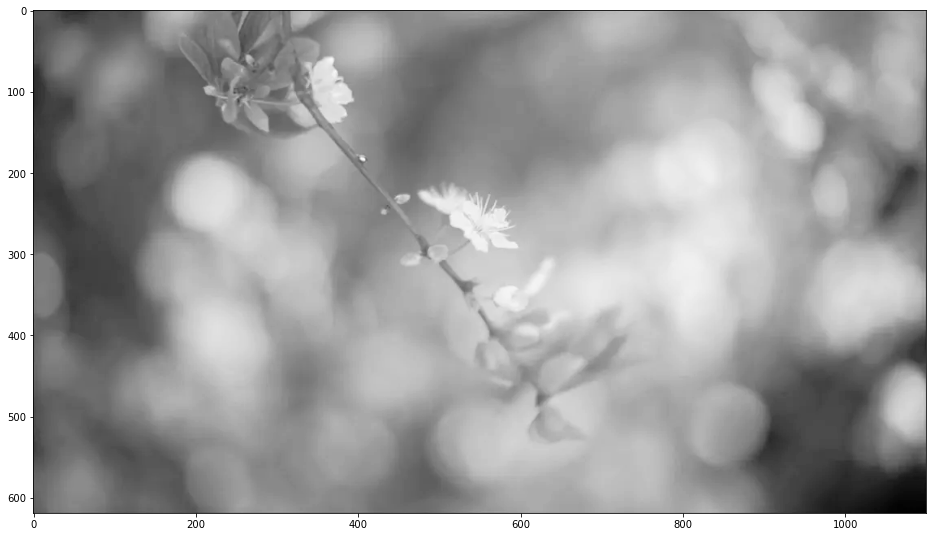

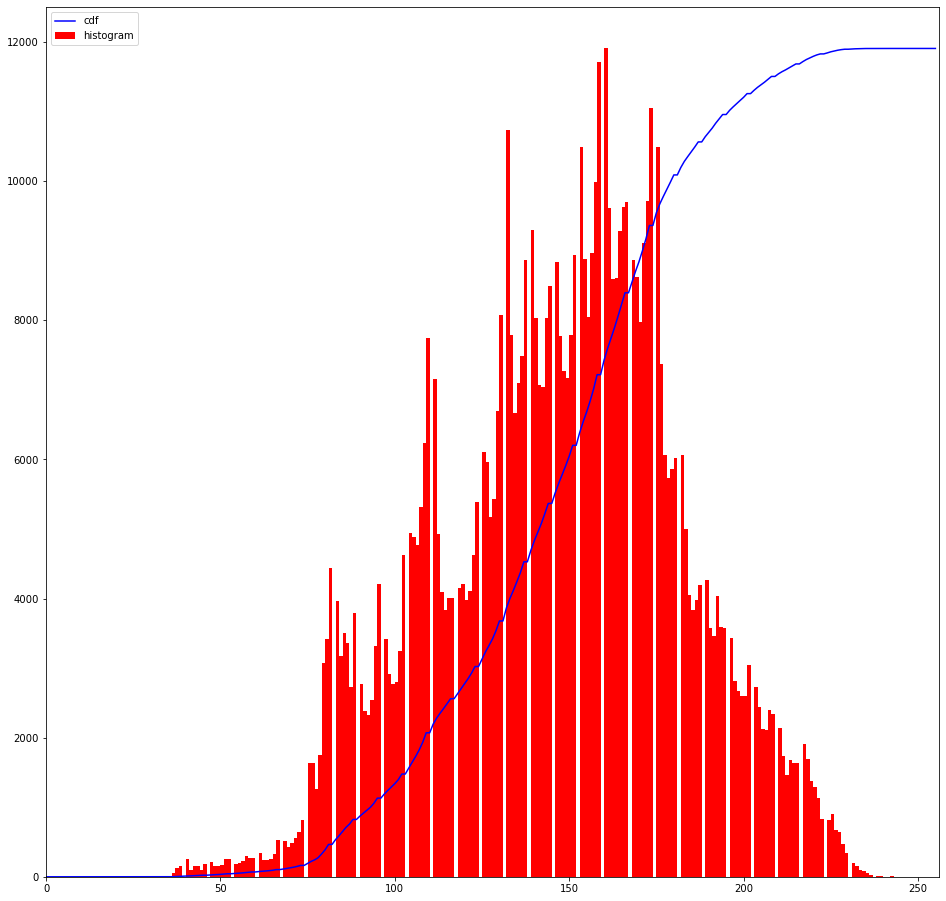

In [13]:
plt.imshow(img, cmap='Greys_r')
plt.show()

hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

### Global equalization

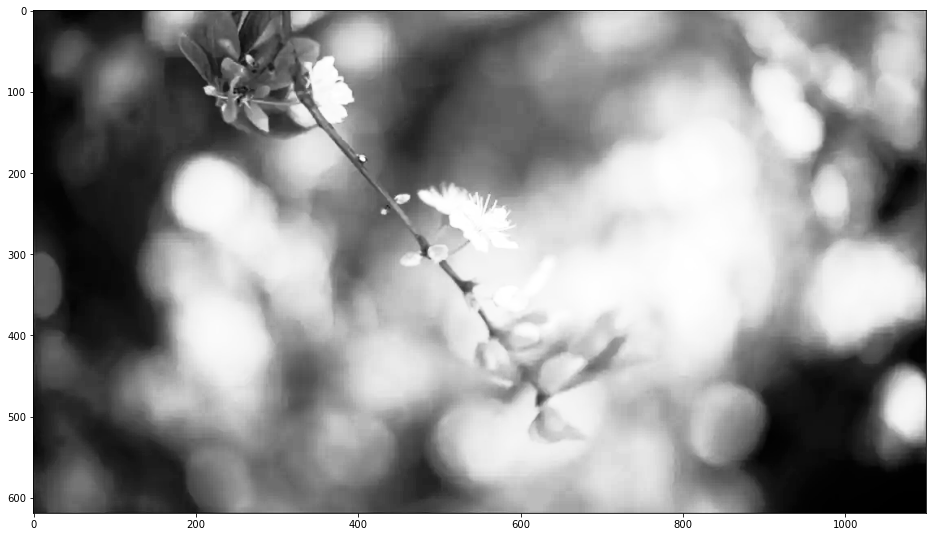

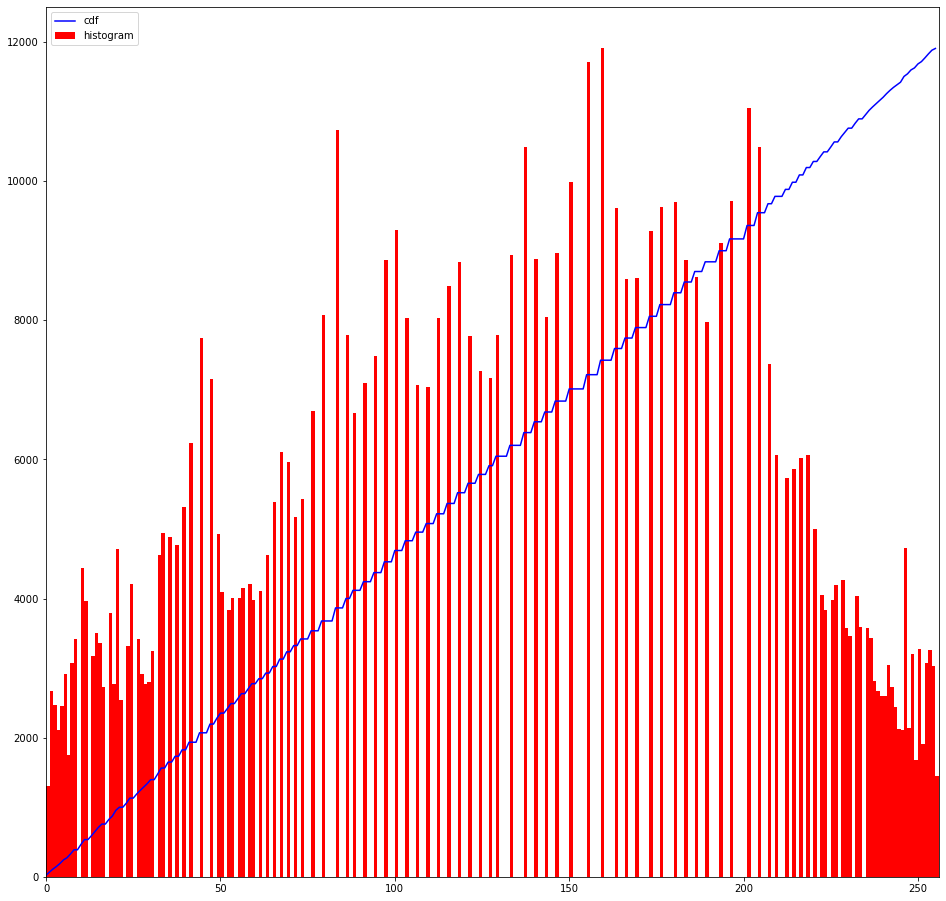

In [14]:
plt.imshow(img_global, cmap='Greys_r')
plt.show()

hist,bins = np.histogram(img_global.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img_global.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

### Local equalization

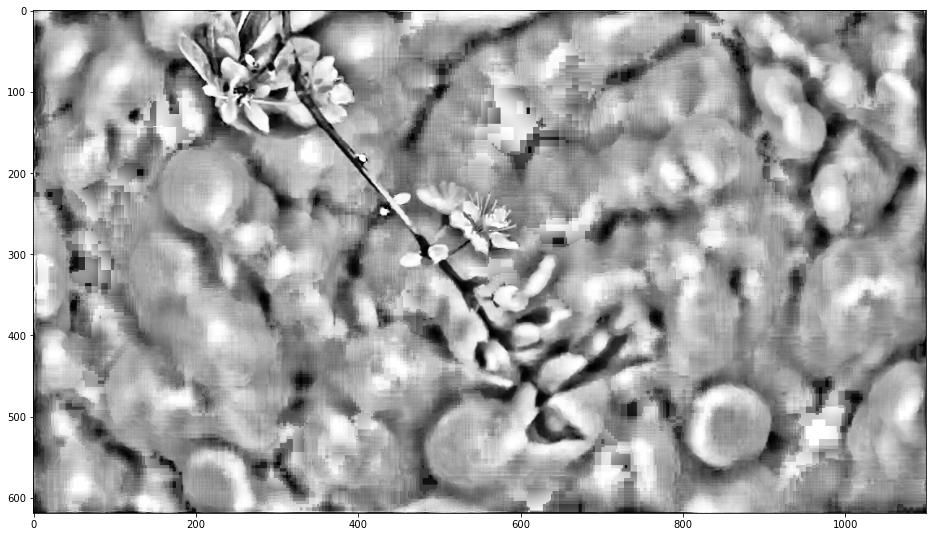

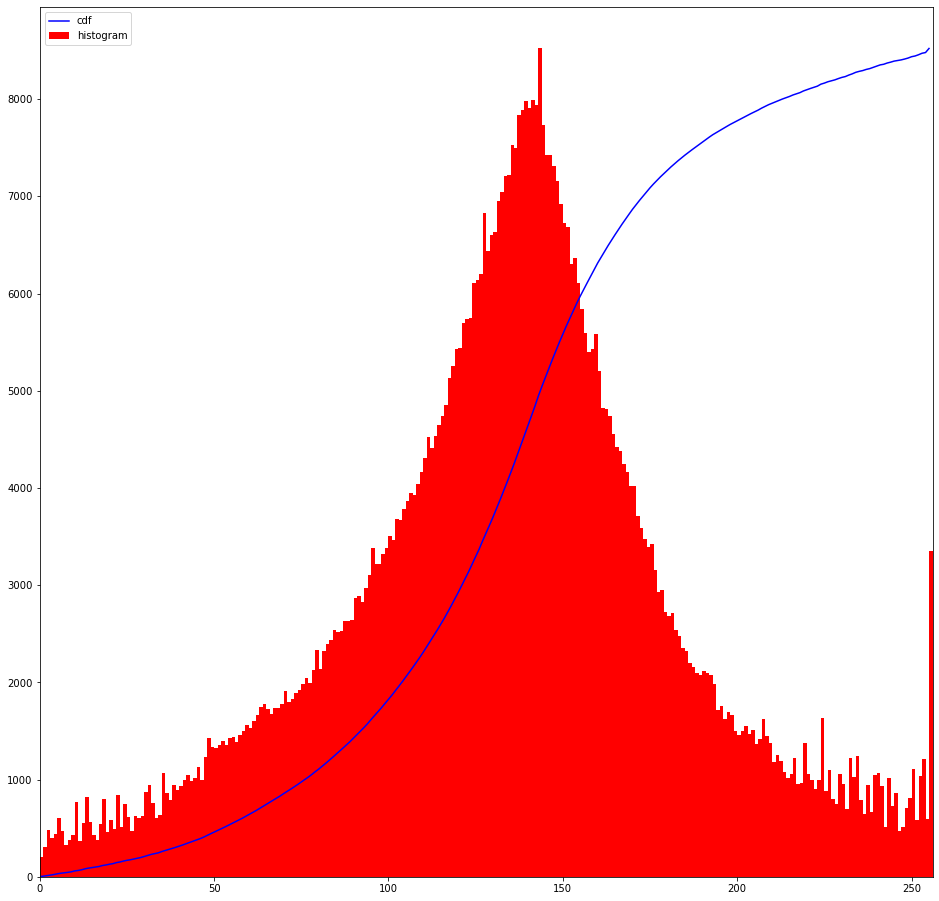

In [15]:
plt.imshow(img_local, cmap='Greys_r')
plt.show()

hist,bins = np.histogram(img_local.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img_local.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

#### 10 - Observations

Between the initial (original) image and the image resulting from the global equalization, we can see an improvement of the image contrast, the histogram occupies the whole dynamic range and there's also an improvement on grayscales distribution. 
The image resulting from the local equalization, however, has a very high contrast (but the grayscales occupy the whole dynamic range) and presents an edge effect in every local equalization zone or section, we can even see the borders of some zones.
AHE divides an image to many sections and produces a distinct histogram for each section, so the equalization in each section differs from the other section, the stretcinh applied to 2 sections can be a lot different. This can result in an edge effect because the pixels on the egde of each section got a transformation that can be different from the transformation applied the the other section's edge pixels.

# Contrastive Limited Adaptive Equalization

 AHE has a tendency to overamplify noise in relatively homogeneous regions of an image. A variant of adaptive histogram equalization called contrast-limited adaptive histogram equalization (CLAHE) prevents this effect by limiting the amplification.

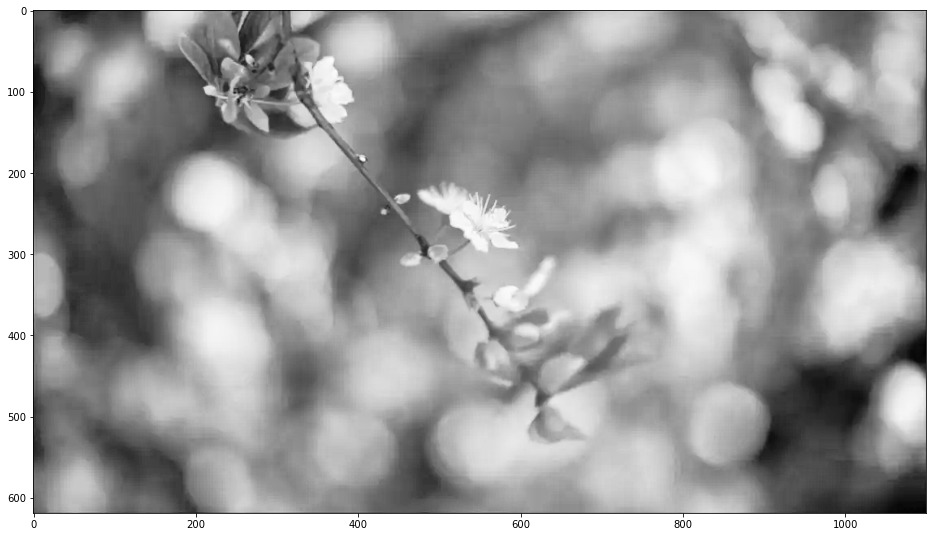

In [16]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

path = "flower.png"
img = cv.imread(path)
grayimg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# create a CLAHE object (Arguments are optional).
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(grayimg)

plt.imshow(cl1, cmap="Greys_r")
plt.show()

#### 11 -  Let's tune the createCLAHE parameters and see what happens

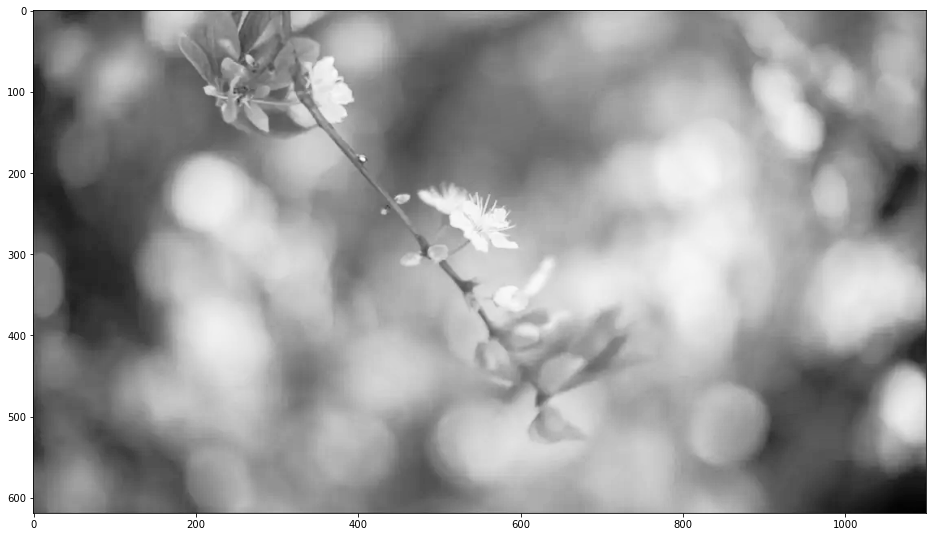

In [17]:
#We decrease the clipLimit from 2.0 to 1.0 and the tileGridSize to (4,4)
clahe0 = cv.createCLAHE(clipLimit=1.0, tileGridSize=(4,4))
cl0 = clahe0.apply(grayimg)

plt.imshow(cl0, cmap="Greys_r")
plt.show()

The constrast is a little bit decreased

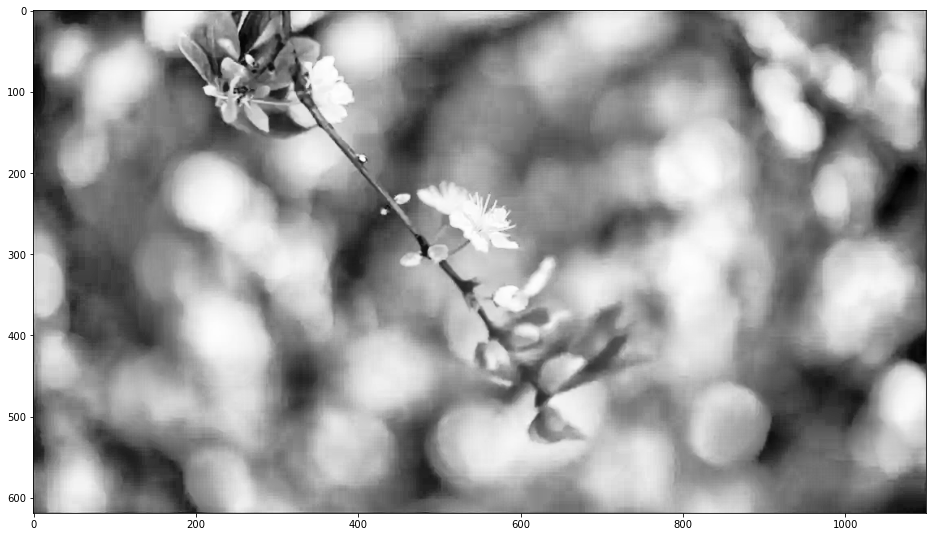

In [18]:
#We increase the clipLimit to 5.0
clahe1 = cv.createCLAHE(clipLimit=5.0, tileGridSize=(8,8))
cl2 = clahe1.apply(grayimg)

plt.imshow(cl2, cmap="Greys_r")
plt.show()

In [ ]:
The contrastis increased.

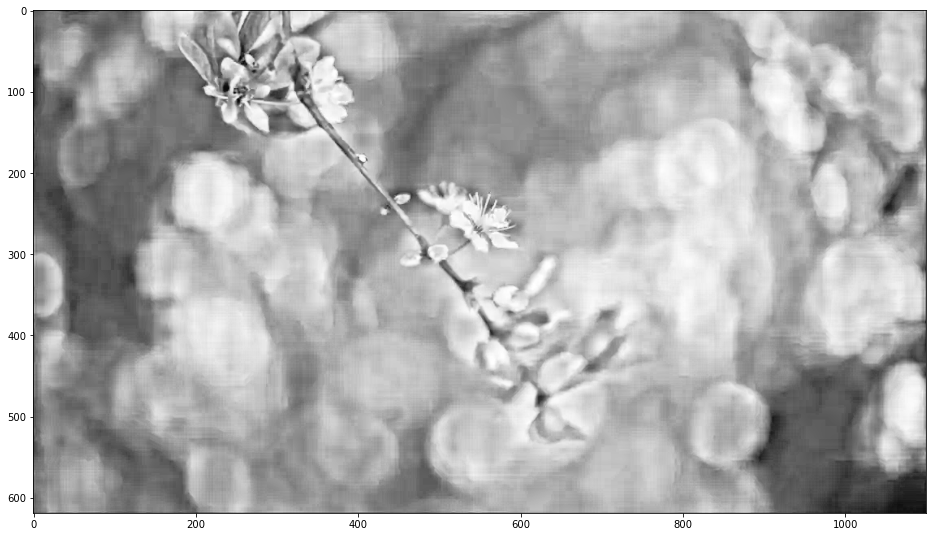

In [19]:
#We increase the clipLimit to 5.0 and the tileGridSize to (50,50)
clahe2 = cv.createCLAHE(clipLimit=5.0, tileGridSize=(50,50))
cl3 = clahe2.apply(grayimg)

plt.imshow(cl3, cmap="Greys_r")
plt.show()

The difference between this image and the previous one is that we can see regions on the image, we can assume that the tileGridSize parameter is related to the size of the local zones for histogram equalization.

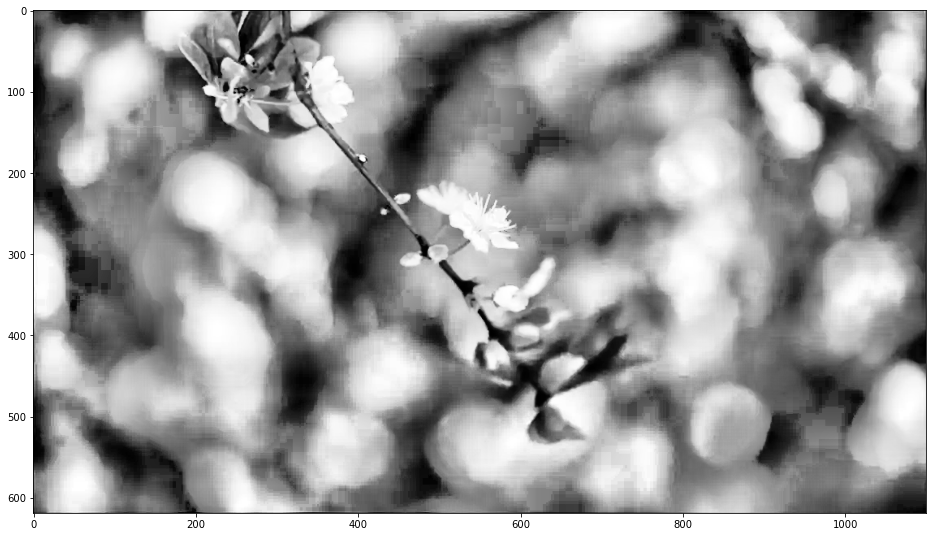

In [20]:
#We increase the clipLimit to 20.0
clahe3 = cv.createCLAHE(clipLimit=20.0, tileGridSize=(8,8))
cl4 = clahe3.apply(grayimg)

plt.imshow(cl4, cmap="Greys_r")
plt.show()

The contrast is increased more than when we changed the clipLimit to 5.0.

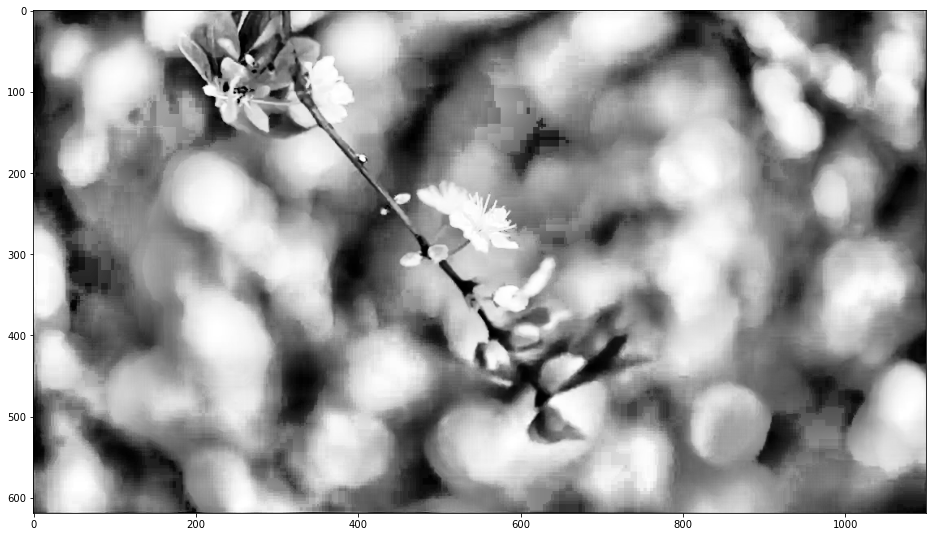

In [21]:
#We increase the clipLimit to 100.0
clahe4 = cv.createCLAHE(clipLimit=100.0, tileGridSize=(8,8))
cl5 = clahe4.apply(grayimg)

plt.imshow(cl5, cmap="Greys_r")
plt.show()

This is the highest contrast we got since we started increasing the clipLimit

#### Observations and comments

The tile represents the sections that the image is devided into, histogram equalization is then performed on each tile using a pre-defined clip limit.
"clipLimit" is the threshold for contrast limit and "tileGridSize" is the size of grid for histogram equalization.As stated, the input image will be divided into equally sized rectangular tiles, "tileGridSize" defines the number of tiles in row and column.
The histogram is  calculated as a set of bins for tile. Histogram bin values above the "clipLimit" are accumulated and distributed to other bins. CDF is then calculated for the histogram values. CDF values of each tile are scaled and mapped using the input image pixel values. 
The resulting tiles are stitched together using bilinear interpolation, to generate an output image with improved contrast. 